<a href="https://colab.research.google.com/github/akashaky/Tomatao-leaf-diseases-with-CNN/blob/master/Tomato_leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akashkumarpandey","key":"72f3b7d130236604cc4258ea79953c89"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.
!kaggle datasets download -d kaustubhb999/tomatoleaf

chmod: cannot access '/root/.kaggle/kaggle.': No such file or directory
 94% 169M/179M [00:07<00:00, 19.3MB/s]
100% 179M/179M [00:07<00:00, 25.0MB/s]


In [5]:
from zipfile import ZipFile
file_name= "tomatoleaf.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
transform_train =transforms.Compose([
        transforms.RandomResizedCrop(128),
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
])
transform_test =transforms.Compose([
        # transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
])

In [7]:
train_dataset = torchvision.datasets.ImageFolder(root= "/content/tomato/train", transform=transform_train)

In [8]:
num_classes=10
batch_size=4

In [29]:
len(train_dataset)

10000

In [9]:
trainloader= torch.utils.data.DataLoader(train_dataset,batch_size=batch_size, shuffle= True)


In [10]:
def imshow(img,title):
  npimg = img.numpy()/2 +0.5
  plt.figure(figsize=(batch_size,1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.title(title)
  plt.show()

In [11]:
dataiter= iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 128, 128])
torch.Size([3, 128, 128])
4


In [12]:
def show_batch_images(dataloader):
  images,labels= next(iter(dataloader))
  img= torchvision.utils.make_grid(images)
  imshow(img, title= [str(x.item()) for x in labels])

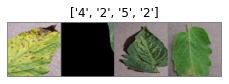

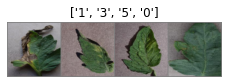

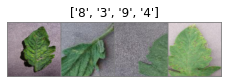

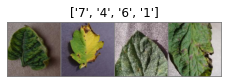

In [13]:
for i in range(4):
  show_batch_images(trainloader)

#CNN

In [14]:
class FirstCNN_2(nn.Module):
  def __init__(self):
    super(FirstCNN_2,self).__init__()
    self.model=nn.Sequential(
        nn.Conv2d(3,6,7),
        nn.AvgPool2d(4,stride=4),
        nn.Conv2d(6,16,7),
         nn.AvgPool2d(4,stride=4)
    )

  def forward(self,x):
    x=self.model(x)
    return x

In [15]:
net = FirstCNN_2()
out=net(images)
out.shape

torch.Size([4, 16, 6, 6])

In [16]:
class  LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3,6,7),
        nn.ReLU(),
        nn.AvgPool2d(4,stride=4),
        nn.Conv2d(6,16,7),
        nn.ReLU(),
        nn.AvgPool2d(4,stride=4)
    )
    self.fc_model =nn.Sequential(
      nn.Linear(576,400),
      nn.ReLU(),
      nn.Linear(400,120),
      nn.ReLU(),
      nn.Linear(120,10)
    )
  def forward(self,x):
      # print(x.shape)
      x= self.cnn_model(x)
      # print(x.shape)
      x=x.view(x.size(0),-1) #flatening of tensor such that such that it has same dimension as the first index(batch) and everything i.e 16,5,5 collapse to one index
      # print(x.shape)
      x=self.fc_model(x)
      # print(x.shape)
      return x

In [17]:
net= LeNet()
out= net(images)
print(out)

tensor([[-0.0683,  0.0290, -0.0167, -0.0110, -0.0160, -0.0187,  0.0531,  0.0093,
          0.0776,  0.0459],
        [-0.0671,  0.0145, -0.0028, -0.0109, -0.0192, -0.0122,  0.0520,  0.0095,
          0.0825,  0.0461],
        [-0.0725,  0.0118, -0.0087, -0.0036, -0.0172, -0.0044,  0.0515,  0.0112,
          0.0790,  0.0440],
        [-0.0685,  0.0200, -0.0080, -0.0134, -0.0148, -0.0125,  0.0479,  0.0140,
          0.0814,  0.0480]], grad_fn=<AddmmBackward>)


In [18]:
batch_size=128
trainset = torchvision.datasets.ImageFolder(root= "/content/tomato/train", transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testset= torchvision.datasets.ImageFolder(root= "/content/tomato/val", transform=transform_train)
testloader= torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

In [19]:
def evaluation(dataLoader):
  total,correct=0,0
  for data in dataLoader:
    inputs,labels=data
    outputs=net(inputs)
    _,pred = torch.max((outputs.data),1)
    total=total+labels.size(0)
    correct+=(pred==labels).sum().item()
    return 100*correct/total

In [20]:
import torch.optim as optim
loss_fn= nn.CrossEntropyLoss()
opt= optim.Adam(net.parameters())

Epoch: 0/16 , Train acc: 33.59, Test Acc: 42.19
Epoch: 1/16 , Train acc: 46.09, Test Acc: 48.44
Epoch: 2/16 , Train acc: 45.31, Test Acc: 46.88
Epoch: 3/16 , Train acc: 52.34, Test Acc: 50.00
Epoch: 4/16 , Train acc: 59.38, Test Acc: 67.19
Epoch: 5/16 , Train acc: 60.16, Test Acc: 57.81
Epoch: 6/16 , Train acc: 64.06, Test Acc: 41.41
Epoch: 7/16 , Train acc: 74.22, Test Acc: 67.97
Epoch: 8/16 , Train acc: 71.88, Test Acc: 64.06
Epoch: 9/16 , Train acc: 72.66, Test Acc: 62.50
Epoch: 10/16 , Train acc: 71.09, Test Acc: 71.88
Epoch: 11/16 , Train acc: 75.00, Test Acc: 70.31
Epoch: 12/16 , Train acc: 77.34, Test Acc: 69.53
Epoch: 13/16 , Train acc: 71.88, Test Acc: 69.53
Epoch: 14/16 , Train acc: 76.56, Test Acc: 64.84
Epoch: 15/16 , Train acc: 77.34, Test Acc: 78.91


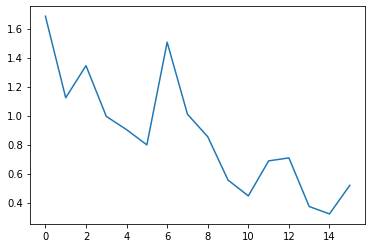

CPU times: user 19min 51s, sys: 10.1 s, total: 20min 1s
Wall time: 20min 1s


In [22]:
%%time
loss_arr=[]
loss_epoch_arr=[]
max_e=16

for epoch in range(max_e):
  for i, data in enumerate(trainloader,0):
    inputs,labels=data
    opt.zero_grad()
    outputs=net(inputs)
    loss= loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())
  
  print('Epoch: %d/%d , Train acc: %0.2f, Test Acc: %0.2f' % (epoch, max_e, evaluation(trainloader),evaluation(testloader)))

plt.plot(loss_epoch_arr)
plt.show()

